In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
eps = pd.read_csv('simpsons_episodes.csv')
lines = pd.read_csv('simpsons_script_lines.csv')
chars = pd.read_csv('simpsons_characters.csv')
locs = pd.read_csv('simpsons_locations.csv')

In [37]:
eps.head(5)

,id,title,original_air_date,production_code,season,number_in_season,number_in_series,us_viewers_in_millions,views,imdb_rating,imdb_votes,image_url,video_url
0,10,Homer's Night Out,1990-03-25,7G10,1,10,10,30.3,50816.0,7.4,1511.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/275197507879
1,12,Krusty Gets Busted,1990-04-29,7G12,1,12,12,30.4,62561.0,8.3,1716.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/288019523914
2,14,"Bart Gets an ""F""",1990-10-11,7F03,2,1,14,33.6,59575.0,8.2,1638.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/260539459671
3,17,Two Cars in Every Garage and Three Eyes on Eve...,1990-11-01,7F01,2,4,17,26.1,64959.0,8.1,1457.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/260537411822
4,19,Dead Putting Society,1990-11-15,7F08,2,6,19,25.4,50691.0,8.0,1366.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/260539459670


In [47]:
lines.head(5)

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,name_x,normalized_name_x,gender,name_y,normalized_name_y
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31.0,Miss Hoover,miss hoover,f,Springfield Elementary School,springfield elementary school
1,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22.0,Miss Hoover,miss hoover,f,Springfield Elementary School,springfield elementary school
2,14828,49,215,"Miss Hoover: Thank you, Ralph. Very graphic. L...",784000,True,464,3.0,Miss Hoover,Springfield Elementary School,"Thank you, Ralph. Very graphic. Lisa Simpson? ...",thank you ralph very graphic lisa simpson woul...,14.0,Miss Hoover,miss hoover,f,Springfield Elementary School,springfield elementary school
3,14830,49,217,Miss Hoover: Dear God!,803000,True,464,3.0,Miss Hoover,Springfield Elementary School,Dear God!,dear god,2.0,Miss Hoover,miss hoover,f,Springfield Elementary School,springfield elementary school
4,15284,51,35,Miss Hoover: I question the educational value ...,226000,True,464,3.0,Miss Hoover,Springfield Elementary School,I question the educational value of this assem...,i question the educational value of this assembly,8.0,Miss Hoover,miss hoover,f,Springfield Elementary School,springfield elementary school


In [39]:
chars.head(5)

,id,name,normalized_name,gender
0,7,Children,children,NaN
1,12,Mechanical Santa,mechanical santa,NaN
2,13,Tattoo Man,tattoo man,NaN
3,16,DOCTOR ZITSOFSKY,doctor zitsofsky,NaN
4,20,Students,students,NaN


In [40]:
locs.head(5)

,id,name,normalized_name
0,1,Street,street
1,2,Car,car
2,3,Springfield Elementary School,springfield elementary school
3,4,Auditorium,auditorium
4,5,Simpson Home,simpson home


In [41]:
chars=chars.rename(columns = {'id':'character_id'})
locs=locs.rename(columns = {'id':'location_id'})

In [42]:
lines2 = pd.merge(lines,chars,on='character_id')

In [43]:
lines = pd.merge(lines2,locs,on='location_id')

In [48]:
lines = lines.rename(columns = {'name_x':'char_name',
                                'normalized_name_x':'char_name_norm',
                                'name_y':'loc_name',
                                'normalized_name_y':'loc_name_norm'})

In [225]:
eps.describe()

C:\Users\corderoja\AppData\Local\Continuum\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,id,season,number_in_season,number_in_series,us_viewers_in_millions,views,imdb_rating,imdb_votes
count,600.000000,600.000000,600.000000,600.000000,594.000000,596.000000,597.000000,597.000000
mean,300.500000,14.100000,11.585000,300.500000,11.842795,48759.377517,7.386097,832.365159
std,173.349358,7.755444,6.549881,173.349358,6.414218,17751.308464,0.732439,396.117937
min,1.000000,1.000000,1.000000,1.000000,2.320000,144.000000,4.500000,104.000000
25%,150.750000,7.000000,6.000000,150.750000,NaN,NaN,NaN,NaN
50%,300.500000,14.000000,11.000000,300.500000,NaN,NaN,NaN,NaN
75%,450.250000,21.000000,17.000000,450.250000,NaN,NaN,NaN,NaN
max,600.000000,28.000000,25.000000,600.000000,33.600000,171408.000000,9.200000,3734.000000


In [227]:
lines.describe()

,id,episode_id,number,location_id,word_count
count,116039.000000,116039.000000,116039.000000,116039.000000,1.086930e+05
mean,75436.809237,264.236352,142.437792,830.780557,3.802013e+01
std,37926.452333,134.877621,83.705997,1124.321648,4.591158e+03
min,9549.000000,32.000000,1.000000,1.000000,0.000000e+00
25%,42995.000000,151.000000,71.000000,5.000000,NaN
50%,75174.000000,261.000000,141.000000,216.000000,NaN
75%,108218.500000,378.000000,211.000000,1400.000000,NaN
max,141768.000000,506.000000,394.000000,4065.000000,1.145000e+06


## The average rating for all episodes of the Simpsons is 11.84.

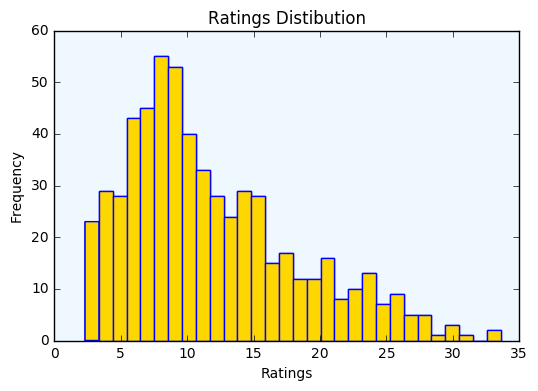

In [238]:
eps['us_viewers_in_millions'].plot(kind='hist',bins=30,color='gold',edgecolor='blue',stacked=True,title='Ratings Distibution').set_axis_bgcolor('aliceblue')
eps['us_viewers_in_millions'].plot(kind='hist',bins=30,color='gold',edgecolor='blue',stacked=True,title='Ratings Distibution').set_xlabel('Ratings')

## The Simpson gets an average 7.2 rating on IMDB. Since Ratings are used to determine the success of a program, I will be using the ratings metric in the project.

In [261]:
x=pd.concat((eps['imdb_rating'],eps['us_viewers_in_millions']),axis = 1)

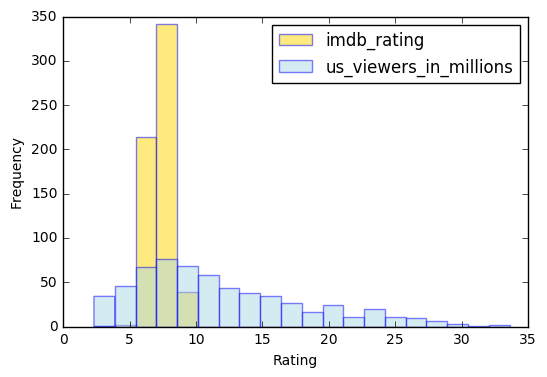

In [273]:
x.plot(kind='hist',bins=20,color=('gold','lightblue'),edgecolor='blue',alpha=0.5).set_xlabel('Rating')

## Over time, ratings for seasons of the episodes see a steady decline up until season 12 where ratings projections jump from 8 million to 15 million.

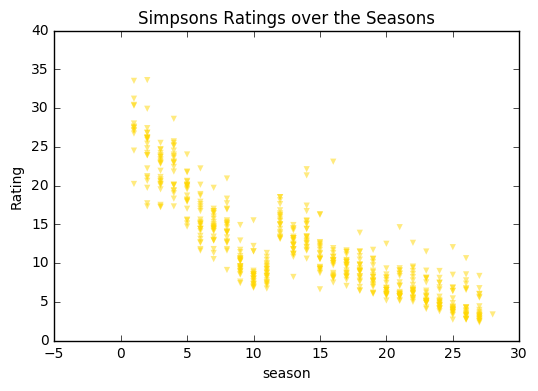

In [274]:
eps.plot('season','us_viewers_in_millions',kind='scatter',title='Simpsons Ratings over the Seasons',
         color='gold',marker='v',alpha=.5,edgecolor='None').set_ylabel('Rating');

In [265]:
np.mean(eps['us_viewers_in_millions'].where(eps['season']==11))

8.772272727272728

In [266]:
np.mean(eps['us_viewers_in_millions'].where(eps['season']==12))

15.485714285714286

## Female characters tend to have significantly less lines in an episode than male characters of The Simpsons

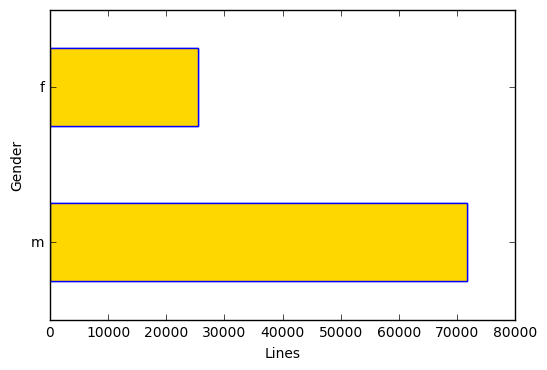

In [268]:
lines['gender'].value_counts().plot(kind='barh',color='gold',edgecolor='blue').set_ylabel('Gender')
lines['gender'].value_counts().plot(kind='barh',color='gold',edgecolor='blue').set_xlabel('Lines');

## Based on thresholds, we can group different groups of characters based on the amount of lines each character had per episode of The Simpsons

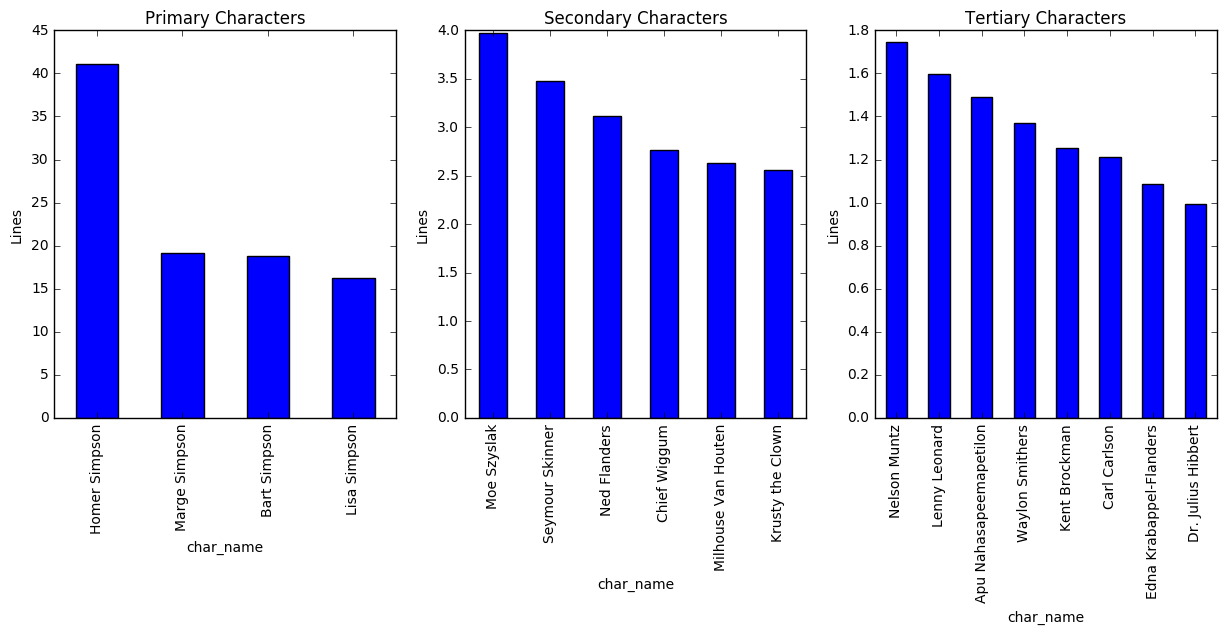

In [270]:
plt.subplot(1, 3, 1)
(lines.groupby("char_name").count()["id"].sort_values(ascending=False)[0:4]/600).plot(kind='bar',figsize=(15,5),title='Primary Characters').set_ylabel('Lines')
plt.subplot(1, 3, 2)
(lines.groupby("char_name").count()["id"].sort_values(ascending=False)[5:11]/600).plot(kind='bar',title ='Secondary Characters').set_ylabel('Lines')
plt.subplot(1, 3, 3)
(lines.groupby("char_name").count()["id"].sort_values(ascending=False)[12:20]/600).plot(kind='bar',title='Tertiary Characters').set_ylabel('Lines');

## The same can be done when looking at location. Based on the top locations, the Simpson home seems to trump all other locations. A few locations are even a part of the Simpson home (i.e. Simpson Living Room), which will increase the count even more.

In [271]:
lines.groupby("loc_name").count()["id"].sort_values(ascending=False)[0:20]

loc_name
Simpson Home                       26893
Springfield Elementary School       5176
Moe's Tavern                        3401
Springfield Nuclear Power Plant     2421
Kwik-E-Mart                         1149
First Church of Springfield          970
Springfield Street                   955
Springfield Town Hall                947
Simpson Living Room                  936
Simpson Car                          924
Flanders Home                        890
Springfield                          852
Street                               832
Burns Manor                          711
Springfield Retirement Castle        673
Courtroom                            650
Springfield Mall                     621
Simpson Kitchen                      584
Bart's Treehouse                     546
Springfield Convention Center        510
Name: id, dtype: int64